In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [41]:
dt = .001
t = torch.arange(0, 1, dt)
f = torch.sin(2 * np.pi * 40 * t)
g = torch.cos(2 * np.pi * 70 * t)
h = torch.sin(2 * np.pi * 16 * t)
signal = f + g + h
noise = 12 * (torch.rand(len(t)) - .5)
noisy = signal + noise + 1.2

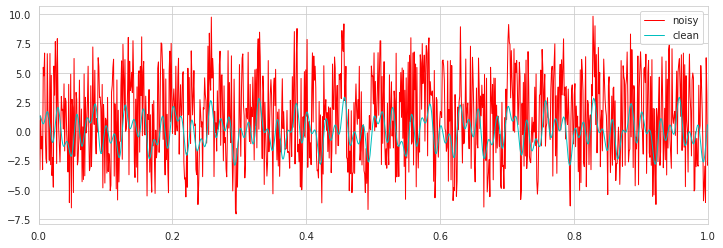

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(t, noisy, color='r', label='noisy', lw=1)
ax.plot(t, signal, color='c', label='clean', lw=1)
ax.set(xlim=(0, 1))
ax.legend()

In [43]:
mm = torch.stack((f, g, h, signal,
                  noise / torch.std(noise),
                  noisy / torch.std(noise)))
mm.shape

torch.Size([6, 1000])

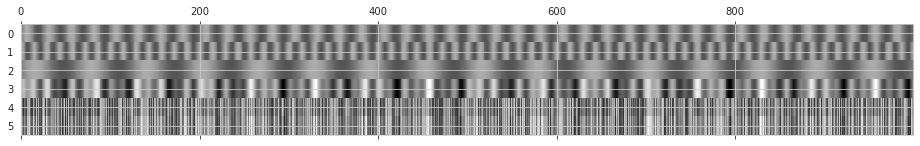

In [44]:
plt.matshow(mm, aspect='auto', cmap='gray')

In [45]:
n = len(t)
fhat = torch.fft.fft(noisy)
psd = torch.real(fhat * torch.conj(fhat) / n)
freq = (1 / (dt * n)) * torch.arange(n)
L = torch.arange(0, n // 2)

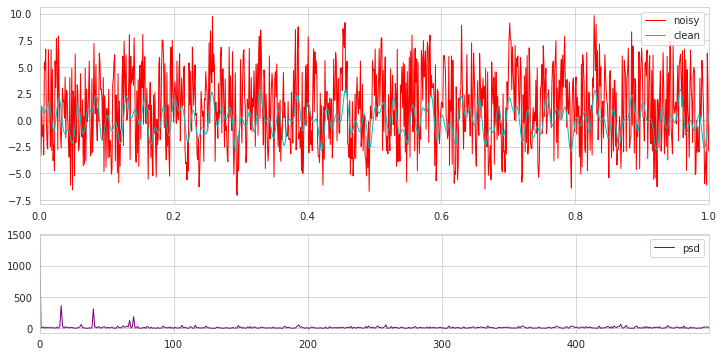

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1,
                               figsize=(12, 6),
                               gridspec_kw=dict(height_ratios=[1, .5])
                               )

ax1.plot(t, noisy, color='r', label='noisy', lw=1)
ax1.plot(t, signal, color='c', label='clean', lw=1)
ax1.set(xlim=(0, 1))
ax1.legend()

ax2.plot(freq[L], psd[L], color='purple', label='psd', lw=1)
ax2.set(xlim=(L[0], L[-1]))
ax2.legend()

In [53]:
indices = psd > 100
psd[indices], torch.where(indices)

(tensor([1439.0188,  365.3094,  312.0128,  126.7632,  188.7549,  188.7549,
          126.7632,  312.0128,  365.3094]),
 (tensor([  0,  16,  40,  67,  70, 930, 933, 960, 984]),))

In [54]:
# select only the peaks and compute the inverse Fourier Transform
psd_clean = psd * indices
fhat_n = indices * fhat
ffilt = torch.fft.ifft(fhat_n)

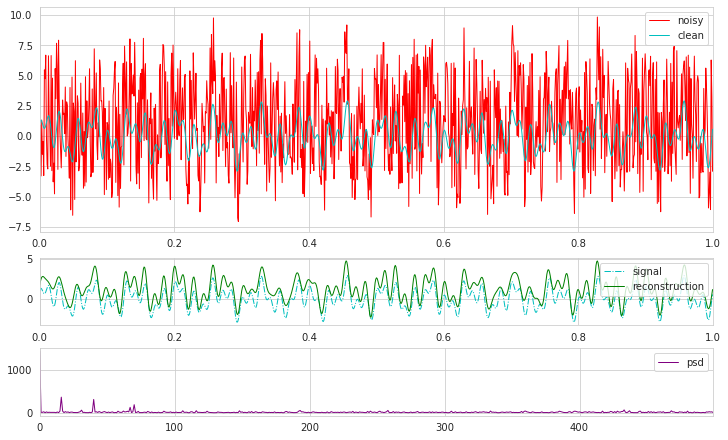

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1, figsize=(10, 6),
    gridspec_kw=dict(height_ratios=[1, .3, .3]),
    constrained_layout=True)

ax1.plot(t, noisy, color='r', label='noisy', lw=1)
ax1.plot(t, signal, color='c', label='clean', lw=1)
ax1.set(xlim=(0, 1))
ax1.legend()

ax2.plot(t, signal, color='c', label='signal', lw=1, linestyle='-.')
ax2.plot(t, ffilt, color='g', label='reconstruction', lw=1)
ax2.set(xlim=(0, 1))  #, ylim=(i / 2 for i in ax1.get_ylim()))
ax2.legend()

ax3.plot(freq[L], psd[L], color='purple', label='psd', lw=1)
ax3.set(xlim=(L[0], L[-1]))
ax3.legend()